<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/CNN_LSTM_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4861 images belonging to 2 classes.
Found 1603 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1, 128, 128, 3)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 1, 126, 126, 64)     │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 1, 63, 63, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 1, 61, 61, 32)       │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_8 (TimeDistributed) │ (None, 1, 30, 30, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_9 (TimeDistributed) │ (None, 1, 28800)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │      11,560,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,580,858 (44.18 MB)

 Trainable params: 11,580,858 (44.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.4978 - loss: 0.6939 - val_accuracy: 0.5465 - val_loss: 0.6677
Epoch 2/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.5877 - loss: 0.6670 - val_accuracy: 0.7099 - val_loss: 0.5979
Epoch 3/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.6385 - loss: 0.6306 - val_accuracy: 0.6669 - val_loss: 0.5976
Epoch 4/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.6562 - loss: 0.6305 - val_accuracy: 0.7049 - val_loss: 0.5772
Epoch 5/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.6745 - loss: 0.6111 - val_accuracy: 0.7099 - val_loss: 0.5942


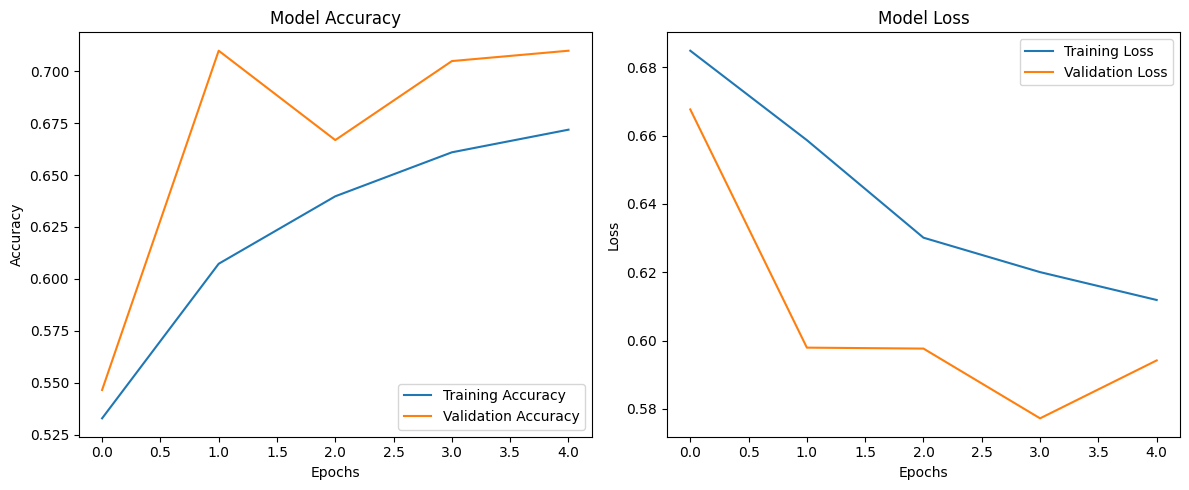

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Input, TimeDistributed, LSTM
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive for dataset access
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
dataset_path = '/content/drive/MyDrive/archive1'
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

# Image dimensions and batch size
image_size = (128, 128)  # Adjust to match LSTM architecture input
batch_size = 16

# Data augmentation setup
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data preprocessing for training
train_generator = train_data_gen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

# Preprocessing for testing
test_data_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_data_gen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

# Define CNN-LSTM Model
input_shape = (1, 128, 128, 3)  # TimeDistributed expects 5D input

inputs = Input(shape=input_shape)

# TimeDistributed Conv2D + MaxPooling2D
x = TimeDistributed(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'))(inputs)
x = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(x)

x = TimeDistributed(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid'))(x)
x = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(x)

# Flatten within TimeDistributed
x = TimeDistributed(Flatten())(x)

# LSTM layer
x = LSTM(100, activation='tanh')(x)

# Fully connected output layer
outputs = Dense(2, activation='softmax')(x)

# Create Model
model = Model(inputs, outputs)

# Compile the model with binary_crossentropy
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Function to reshape data for 5D input (timesteps=1)
def reshape_data(data_generator):
    for batch_x, batch_y in data_generator:
        batch_x = batch_x.reshape(batch_x.shape[0], 1, *batch_x.shape[1:])  # Add time dimension
        yield batch_x, batch_y

# Train the model
history = model.fit(
    reshape_data(train_generator),
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_data=reshape_data(test_generator),
    validation_steps=len(test_generator),
    verbose=1
)

# Save the trained model
model.save('/content/drive/MyDrive/cnn_lstm_model_with_augmentation_5epochs.h5')

# Visualize Training Results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to reshape test data for prediction
def reshape_test_data(generator):
    reshaped_data = []
    reshaped_labels = []
    for batch_x, batch_y in generator:
        batch_x = batch_x.reshape(batch_x.shape[0], 1, *batch_x.shape[1:])  # Add time dimension
        reshaped_data.append(batch_x)
        reshaped_labels.append(batch_y)
    return np.vstack(reshaped_data), np.vstack(reshaped_labels)

# Reshape test data
test_x, test_y = reshape_test_data(test_generator)

# Make predictions
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_y, axis=1)  # Since labels are one-hot encoded

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))

# Final Accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"\nFinal Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")
